In [1]:
import tensorflow as tf
import pandas as pd
from spacy.lang.en import English
import spacy
import re
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\SHEEL\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [2]:
df = pd.read_csv(r'C:\Users\SHEEL\Desktop\ixxo\tweets-eng.csv', delimiter=',', lineterminator='\n',skipinitialspace=True,skiprows=0, nrows=600000)
df.shape

(600000, 7)

In [3]:
df.head()

,Unnamed: 0,timestamp,Tweet,lang,Sentiment,Subjectivity,Label\r
0,0,2019-05-27 11:49:18+00,Cardano: Digitize Currencies; EOS https://t.co...,en,0.0,0.00,0
1,1,2019-05-27 11:49:06+00,Another Test tweet that wasn't caught in the s...,en,0.0,0.00,0
2,2,2019-05-27 11:49:22+00,Current Crypto Prices! \n\nBTC: $8721.99 USD\n...,en,0.0,0.40,0
3,3,2019-05-27 11:49:23+00,Spiv (Nosar Baz): BITCOIN Is An Asset &amp; NO...,en,0.0,0.00,0
4,4,2019-05-27 11:49:25+00,@nwoodfine We have been building on the real #...,en,-0.1,0.35,0


In [4]:
df = df.rename(columns={'Label\r':'Label'})
df = df.rename(columns={'Tweet':'Text'})

In [5]:
df['Label'].value_counts()

0    422811
1    177189
Name: Label, dtype: int64

In [6]:
df.head()

,Unnamed: 0,timestamp,Text,lang,Sentiment,Subjectivity,Label
0,0,2019-05-27 11:49:18+00,Cardano: Digitize Currencies; EOS https://t.co...,en,0.0,0.00,0
1,1,2019-05-27 11:49:06+00,Another Test tweet that wasn't caught in the s...,en,0.0,0.00,0
2,2,2019-05-27 11:49:22+00,Current Crypto Prices! \n\nBTC: $8721.99 USD\n...,en,0.0,0.40,0
3,3,2019-05-27 11:49:23+00,Spiv (Nosar Baz): BITCOIN Is An Asset &amp; NO...,en,0.0,0.00,0
4,4,2019-05-27 11:49:25+00,@nwoodfine We have been building on the real #...,en,-0.1,0.35,0


In [7]:
from nltk.corpus import stopwords

def text_cleaning(text):
    forbidden_words = set(stopwords.words('english'))
    text = ' '.join(text.split('.'))
    text = re.sub('\/',' ',text)
    text = text.strip('\'"')
    text = re.sub(r'@([^\s]+)',r'\1',text)
    text = re.sub(r'\\',' ',text)
    text = text.lower()
    text = re.sub('[\s]+', ' ', text)
    text = re.sub(r'#([^\s]+)', r'\1', text)
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',text)
    text = re.sub(r'((http)\S+)','',text)
    text = re.sub(r'((rt)\S+)','',text)
    text = re.sub(r'\s+', ' ', re.sub('[^A-Za-z]', ' ', text.strip().lower())).strip()
    text = re.sub(r'\W+', ' ', text.strip().lower()).strip()
    text = [word for word in text.split() if word not in forbidden_words]
    return ' '.join(text)

df['Text'] = df['Text'].apply(lambda text: text_cleaning(text))
df.sample(3)

,Unnamed: 0,timestamp,Text,lang,Sentiment,Subjectivity,Label
59649,59649,2019-05-11 05:26:27+00,exactly identical see green w according btc pr...,en,0.025000,0.275000,0
209677,209677,2019-05-13 08:22:19+00,toqqn raised funds used legal ooobtc obx tqn c...,en,0.200000,0.200000,0
246721,246721,2019-05-13 16:13:14+00,bitcoin btc technical analysis breaks new rall...,en,0.068182,0.277273,0


In [8]:
df['Label'].value_counts()

0    422811
1    177189
Name: Label, dtype: int64

In [9]:
sp = spacy.load('en_core_web_sm')
import time
t1=time.time()
output=[]

for sentence in df['Text']:
    sentence=sp(str(sentence))
    s=[token.lemma_ for token in sentence]
    output.append(' '.join(s))
df['processed']=pd.Series(output)
t=time.time()-t1
print("Time" + str(t))

In [ ]:
df = df.reset_index()

In [ ]:
df['processed'][100]

'wonderful meeting bobbyclee along kb shroff great time discuss industry future trend technology bitcoin tech industry investment future futuretrend blockchain trend co lelr yff k'

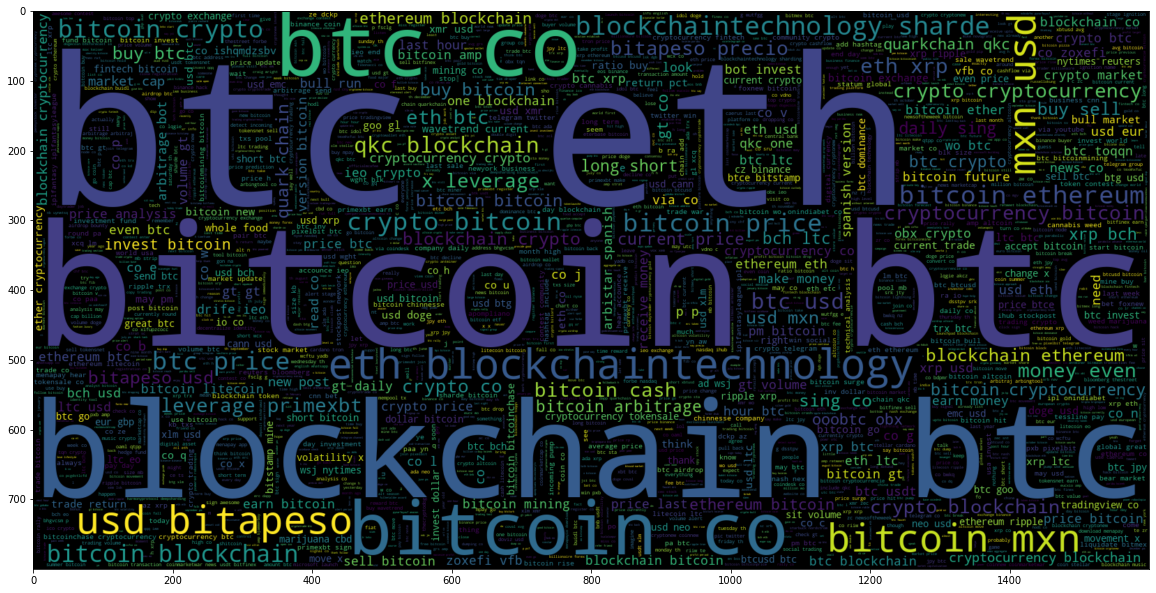

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
plt.figure(figsize = (20,20))
wc = WordCloud(width = 1600 , height = 800 , max_words = 3000).generate(" ".join(df[df.Label == 0].processed))
plt.imshow(wc , interpolation = 'bilinear')

In [ ]:
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 267000
embedding_dim = 64
max_length = 70
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000
#Tokenization

tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(df['processed'].values)
word_index = tokenizer.word_index
print(len(word_index))

492165


In [20]:
X = tokenizer.texts_to_sequences(df['processed'].values)                         #Tokenize the dataset
X = pad_sequences(X, maxlen=max_length)    
Y=df['Label']                                                                   #Assign the value of y  
print(Y.shape)

(600000,)


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.20,random_state=41,shuffle=True)

In [22]:
model = tf.keras.Sequential([
        tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
        tf.keras.layers.SpatialDropout1D(0.2),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256,return_sequences=True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256,return_sequences=True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)),
        tf.keras.layers.Dense(50, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 70, 64)            17088000  
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 70, 64)            0         
_________________________________________________________________
bidirectional (Bidirectional (None, 70, 512)           657408    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 70, 512)           1574912   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 256)               656384    
_________________________________________________________________
dense (Dense)                (None, 50)                12850     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5

In [23]:
import numpy as np
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
X_train.shape

(480000, 70)

In [24]:
#callbacks = [EarlyStopping(monitor='val_loss', patience=2)]
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=5,batch_size=1024,shuffle=True,verbose = 1)

Epoch 1/5


CancelledError:  [_Derived_]RecvAsync is cancelled.
	 [[{{node Adam/Adam/update/AssignSubVariableOp/_41}}]]
	 [[gradient_tape/sequential/embedding/embedding_lookup/Reshape/_38]] [Op:__inference_train_function_15696]

Function call stack:
train_function


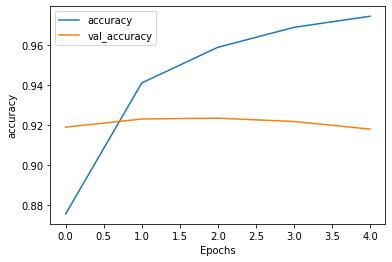

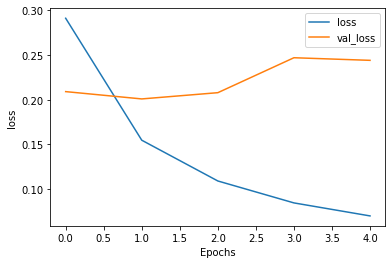

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [21]:
y_predict=model.predict([X_test])
y_predict = np.around(y_predict, decimals = 0)
y_predict

array([[0.],
       [0.],
       [1.],
       ...,
       [1.],
       [0.],
       [1.]], dtype=float32)

In [22]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test,y_predict)
cf

array([[53786,  3282],
       [ 3277, 19655]], dtype=int64)

In [23]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
c_report=classification_report(y_test,y_predict,target_names = ['Fake','True'])
print(c_report)

              precision    recall  f1-score   support

        Fake       0.94      0.94      0.94     57068
        True       0.86      0.86      0.86     22932

    accuracy                           0.92     80000
   macro avg       0.90      0.90      0.90     80000
weighted avg       0.92      0.92      0.92     80000



In [28]:
model.save(r'C:\Users\SHEEL\Desktop\IXXO\defensecommune_ai\AntiFake New -- Aproach-1\BTC_model.h5')

In [29]:
import joblib
joblib.dump(tokenizer, r'C:\Users\SHEEL\Desktop\IXXO\defensecommune_ai\AntiFake New -- Aproach-1\BTC_tokenizer.pkl')

['C:\\Users\\SHEEL\\Desktop\\IXXO\\defensecommune_ai\\AntiFake New -- Aproach-1\\BTC_tokenizer.pkl']